<a href="https://colab.research.google.com/github/MarcoM95/MLPNS2021/blob/main/latent_16_16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout,Flatten,Conv2DTranspose
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, train_labels), (X_test, test_labels) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test  = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print('Train images shape:',X_train.shape)
print('Test images shape:',X_test.shape)

print('(max,min)=', X_train.min(), X_train.max())

170508288/170498071 [==============================] - 11s 0us/step
Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
(max,min)= 0.0 1.0


# 16x16x1

In [4]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D(2, padding='same')(x)

x = Conv2D(1, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Bottleneck
encoded = x

#Decoder
#x = UpSampling2D((2,2))(encoded)
x = Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

decoded = Conv2DTranspose(3, 1, activation='sigmoid', padding='same')(x)

autoencoder_model_16_16_1 = Model(input_img, decoded)
autoencoder_model_16_16_1.compile(optimizer='adam', loss='mse')

autoencoder_model_16_16_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 1)         289       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 1)         4         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        320   

In [5]:
encoder_model_16_16_1 = Model(input_img, encoded)
encoder_model_16_16_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 1)         289       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 1)         4         
Total params: 1,317
Trainable params: 1,251
Non-trainable params: 66
________________________________________________________

In [6]:
autoencoder_model_16_16_1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [7]:
from keras.callbacks import EarlyStopping

er = EarlyStopping(monitor='val_loss', patience=10)
callbacks = [er]

history_AE_16_16_1 = autoencoder_model_16_16_1.fit(X_train, X_train,
                    epochs=30,
                    batch_size=512,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    callbacks=callbacks)

Epoch 1/30
98/98 [==============================] - 39s 92ms/step - loss: 0.0241 - accuracy: 0.3974 - val_loss: 0.0601 - val_accuracy: 0.5086
Epoch 2/30
98/98 [==============================] - 8s 83ms/step - loss: 0.0117 - accuracy: 0.4131 - val_loss: 0.0524 - val_accuracy: 0.5085
Epoch 3/30
98/98 [==============================] - 8s 83ms/step - loss: 0.0096 - accuracy: 0.4284 - val_loss: 0.0397 - val_accuracy: 0.4953
Epoch 4/30
98/98 [==============================] - 8s 83ms/step - loss: 0.0087 - accuracy: 0.4555 - val_loss: 0.0263 - val_accuracy: 0.4488
Epoch 5/30
98/98 [==============================] - 8s 83ms/step - loss: 0.0084 - accuracy: 0.4700 - val_loss: 0.0163 - val_accuracy: 0.4634
Epoch 6/30
98/98 [==============================] - 8s 82ms/step - loss: 0.0082 - accuracy: 0.4774 - val_loss: 0.0118 - val_accuracy: 0.4740
Epoch 7/30
98/98 [==============================] - 8s 84ms/step - loss: 0.0080 - accuracy: 0.4822 - val_loss: 0.0100 - val_accuracy: 0.4777
Epoch 8/30
9

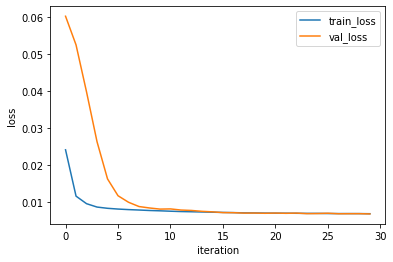

In [8]:
plt.plot(np.array(history_AE_16_16_1.history['loss']), label="train_loss")
plt.plot(np.array(history_AE_16_16_1.history['val_loss']), label="val_loss")
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend()
#plt.savefig('loss_AE.png')
#plt.yscale('log')
#plt.xscale('log')

In [9]:
scores = autoencoder_model_16_16_1.evaluate(X_test,X_test,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0069 - accuracy: 0.5305
Test Loss 0.006874135695397854
Test Accuracy 0.5304588079452515


In [10]:
from numpy import asarray
from numpy import savetxt

loss_AE_16_16_1 = asarray(history_AE_16_16_1.history['loss'])
# save to csv file
savetxt('loss_AE_16_16_1.csv', loss_AE_16_16_1, delimiter=',')

val_loss_AE_16_16_1 = asarray(history_AE_16_16_1.history['val_loss'])
# save to csv file
savetxt('val_loss_AE_16_16_1.csv', val_loss_AE_16_16_1, delimiter=',')

In [11]:
reconstructed_test_images_16_16_1 = autoencoder_model_16_16_1.predict(X_test)
print(reconstructed_test_images_16_16_1.shape)

(10000, 32, 32, 3)


In [12]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [13]:
print(mse(X_test[0],reconstructed_test_images_16_16_1[0]))
print(mse(X_test[10],reconstructed_test_images_16_16_1[10]))
print(mse(X_test[100],reconstructed_test_images_16_16_1[100]))

0.04321790883367779
0.015442846527851665
0.00944031637154798


In [14]:
mse_vec_16_16_1 = np.zeros(X_test.shape[0])
for x in range(X_test.shape[0]):
  mse_vec_16_16_1[x] = mse(X_test[x],reconstructed_test_images_16_16_1[x])

import numpy as np

print(mse_vec_16_16_1.shape)
print(np.mean(mse_vec_16_16_1))

(10000,)
0.020622415072257514


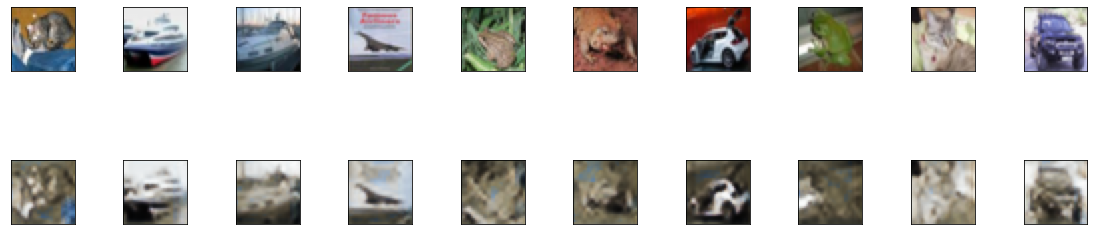

In [15]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(reconstructed_test_images_16_16_1[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
def classifier_conv(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    
    #x = Conv2D(32, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(input)
    x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    #x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(100, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    return Model(input, output)

In [17]:
'''
def classifier_conv(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    
    x = UpSampling2D((2,2))(input)
    x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    #x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    #x = UpSampling2D((2,2))(x)
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(100, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    return Model(input, output)
'''

'\ndef classifier_conv(inp):\n    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))\n    \n    x = UpSampling2D((2,2))(input)\n    x = Conv2D(64, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    #x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    #x = UpSampling2D((2,2))(x)\n    x = Conv2D(128, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    x = Conv2D(128, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    x = Flatten()(x)\n    x = Dense(512, kernel_initializer=\'he_uniform\', activation=\'relu\')(x)\n    x = Dropout(0.35)(x)\n    x = Dense(100, kernel_initializer=\'he_uniform\', activation=\'relu\')(x)\n    x = Dropout(0.5)(x)\n    output = Dense(10, activati

In [18]:
encoded_imgs_train_16_16_1 = encoder_model_16_16_1.predict(X_train)
print(encoded_imgs_train_16_16_1.shape)

(50000, 16, 16, 1)


In [19]:
encoded_imgs_test_16_16_1 = encoder_model_16_16_1.predict(X_test)
print(encoded_imgs_test_16_16_1.shape)

(10000, 16, 16, 1)


In [22]:
def compareinout_encoded(i, outim, testimg, initialshape=(32,32,3)):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(X_test[i], cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  plt.imshow(encoded_imgs_test_16_16_1[0].reshape(32,8).T)
  plt.yticks([])
  ax = fig.add_subplot(133) 
  ax.imshow(reconstructed_test_images_16_16_1[i], cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

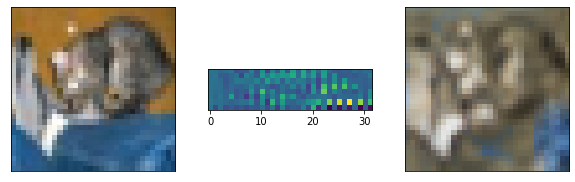

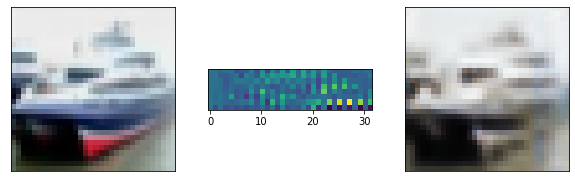

In [23]:
for i in range(2):
  compareinout_encoded(i, reconstructed_test_images_16_16_1, X_test)

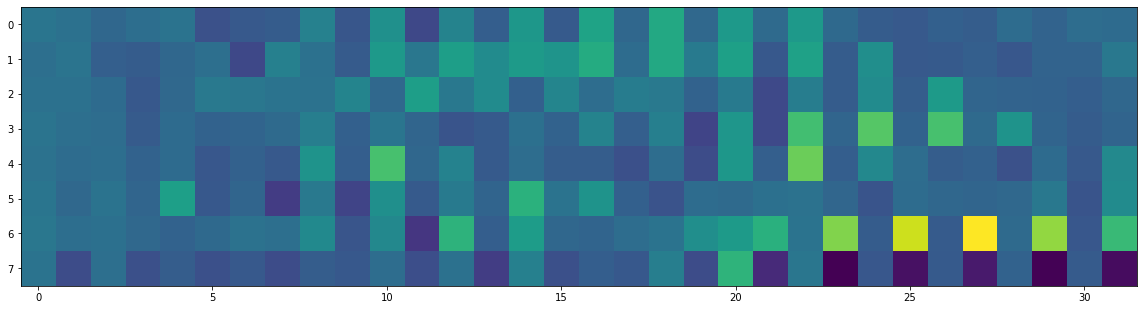

In [24]:
plt.figure(figsize=(20, 8))
plt.imshow(encoded_imgs_test_16_16_1[0].reshape(32,8).T);

In [25]:
classifier_16_16_1 = classifier_conv(encoded_imgs_train_16_16_1)
classifier_16_16_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 128)         512 

In [26]:
import keras
from tensorflow.keras.optimizers import Adam # - Works
opt = Adam(learning_rate=0.001)

classifier_16_16_1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])  # binary_crossentropy

In [27]:
from keras.utils import np_utils

train_labels_categorical = keras.utils.np_utils.to_categorical(train_labels, 10)
test_labels_categorical  = keras.utils.np_utils.to_categorical(test_labels, 10)

print(train_labels_categorical.shape)
print(test_labels_categorical.shape)

(50000, 10)
(10000, 10)


In [28]:
history_class_16_16_1 = classifier_16_16_1.fit(encoded_imgs_train_16_16_1, train_labels_categorical, batch_size=64, epochs=30,
                    validation_data=(encoded_imgs_test_16_16_1, test_labels_categorical))

Epoch 1/30
782/782 [==============================] - 9s 11ms/step - loss: 2.1218 - accuracy: 0.2251 - val_loss: 1.7335 - val_accuracy: 0.3921
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 1.7894 - accuracy: 0.3404 - val_loss: 1.5713 - val_accuracy: 0.4473
Epoch 3/30
782/782 [==============================] - 8s 10ms/step - loss: 1.6491 - accuracy: 0.4025 - val_loss: 1.4664 - val_accuracy: 0.4904
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 1.5432 - accuracy: 0.4513 - val_loss: 1.3068 - val_accuracy: 0.5356
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 1.4629 - accuracy: 0.4816 - val_loss: 1.2543 - val_accuracy: 0.5604
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 1.4082 - accuracy: 0.5066 - val_loss: 1.1922 - val_accuracy: 0.5805
Epoch 7/30
782/782 [==============================] - 8s 10ms/step - loss: 1.3587 - accuracy: 0.5264 - val_loss: 1.1741 - val_accuracy: 0.5901

Text(0.5, 1.0, 'Accuracy Curves')

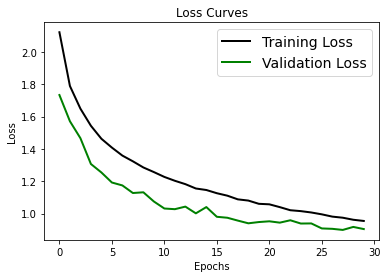

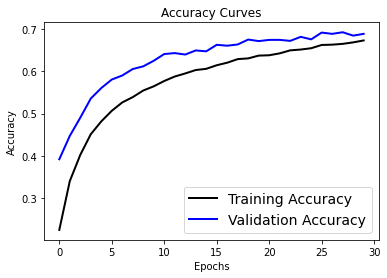

In [29]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_class_16_16_1.history['loss'], 'black', linewidth=2.0)
plt.plot(history_class_16_16_1.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_class_16_16_1.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_class_16_16_1.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [30]:
loss_class_16_16_1 = asarray(history_class_16_16_1.history['loss'])
# save to csv file
savetxt('loss_class_16_16_1.csv', loss_class_16_16_1, delimiter=',')

val_loss_class_16_16_1 = asarray(history_class_16_16_1.history['val_loss'])
# save to csv file
savetxt('val_loss_class_16_16_1.csv', val_loss_class_16_16_1, delimiter=',')

In [31]:
accuracy_class_16_16_1 = asarray(history_class_16_16_1.history['accuracy'])
# save to csv file
savetxt('accuracy_class_16_16_1.csv', accuracy_class_16_16_1, delimiter=',')

val_accuracy_class_16_16_1 = asarray(history_class_16_16_1.history['val_accuracy'])
# save to csv file
savetxt('val_accuracy_class_16_16_1.csv', val_accuracy_class_16_16_1, delimiter=',')

In [32]:
scores = classifier_16_16_1.evaluate(encoded_imgs_test_16_16_1,test_labels_categorical,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9042 - accuracy: 0.6885
Test Loss 0.9041942358016968
Test Accuracy 0.6884999871253967
